In [2]:
#import necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [4]:
#read Data

df = pd.read_csv('delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [ ]:
#select relevent columns

In [5]:
#data Descriptions 

df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


array([[<AxesSubplot:title={'center':'Delivery Time'}>,
        <AxesSubplot:title={'center':'Sorting Time'}>]], dtype=object)

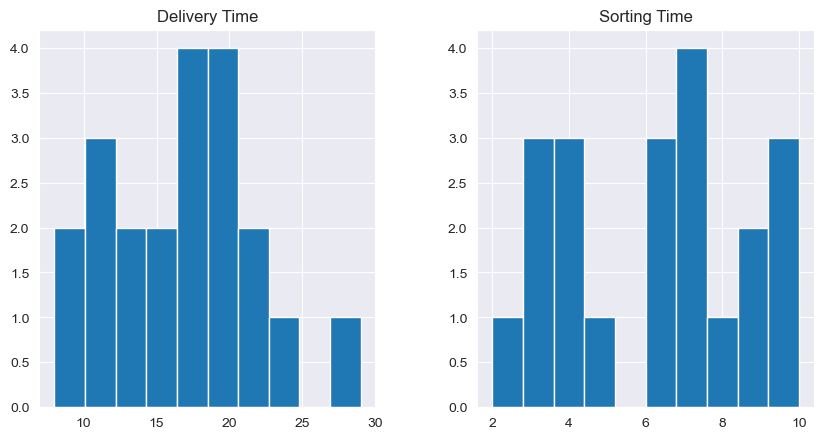

In [40]:
plt.rcParams['figure.figsize'] =(10,5)
plt.rcParams['figure.dpi']=100
sns.set_style('darkgrid')

df.hist()

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

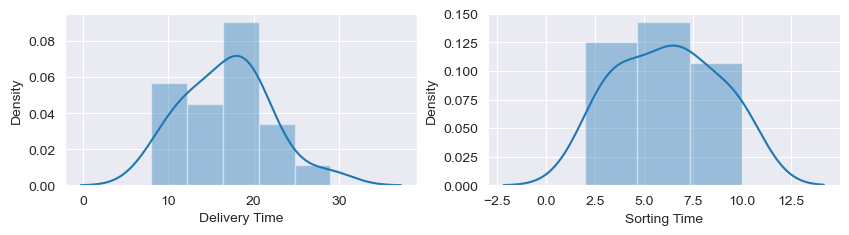

In [41]:
#find the pattern of data and thiere skewness 

plt.subplot(2,2,1)
sns.distplot(df['Delivery Time'])

plt.subplot(2,2,2)
sns.distplot(df['Sorting Time'])

In [42]:
#Skewness
df['Delivery Time'].skew()

0.3523900822831107

In [43]:
df['Sorting Time'].skew()

0.047115474210530174

In [44]:
#find the corelation 

df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<AxesSubplot:>

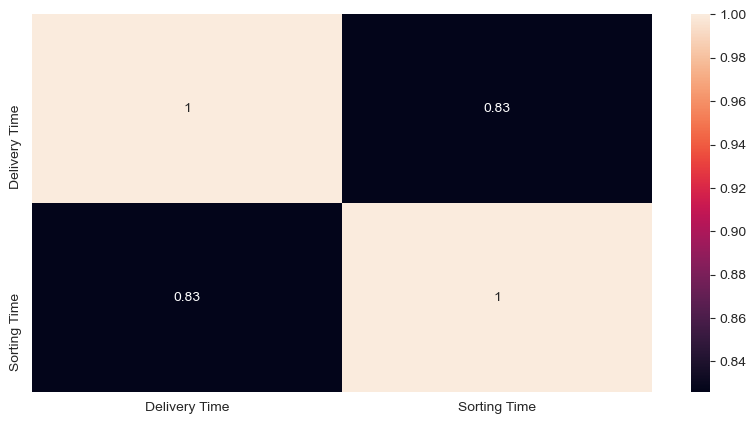

In [45]:
sns.heatmap(df.corr(), annot= True)

In [56]:
#import statsmodel
df.rename(columns={'Sorting Time' : 'ST'},inplace=True)
df.rename(columns={'Delivery Time' : 'DT'},inplace=True)
import statsmodels.formula.api as smf 

In [60]:
model = smf.ols('ST~DT' , data=df ).fit()
model.params

Intercept   -0.756673
DT           0.413744
dtype: float64

In [62]:
#line Eqution 
x = 40

y = 0.413744*x+( -0.756673)
y


15.793087

In [63]:
#print values for t values and p values 
print(model.tvalues)
print(model.pvalues)


Intercept   -0.667290
DT           6.387447
dtype: float64
Intercept    0.512611
DT           0.000004
dtype: float64


In [ ]:
#Hypothesis Testing

#Ho = (m = 0)

#Ha = (m=! 0)

In [ ]:
# p value is less than alfa value then we reject null hypothesis

In [64]:
# r2 value
model.rsquared

0.6822714748417231

In [66]:

#prediction of data
df.head(5)

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [68]:
newdf = pd.DataFrame({
    'DT': [40,50,60,70,80],
    
})

newdf

,DT
0,40
1,50
2,60
3,70
4,80


In [69]:
model.predict(newdf)

0    15.793072
1    19.930508
2    24.067944
3    28.205381
4    32.342817
dtype: float64

In [ ]:
#Data Transformation 

<AxesSubplot:xlabel='ST', ylabel='Density'>

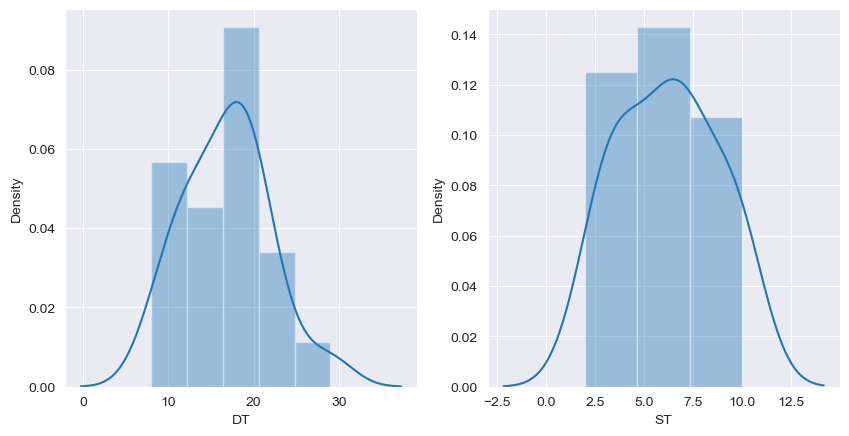

In [70]:
plt.subplot(1,2,1)
sns.distplot(df['DT'])

plt.subplot(1,2,2)
sns.distplot(df['ST'])

# log Transformation 



In [73]:
df['log_DT']=np.log(df['DT'])
df['log_ST']= np.log(df['ST'])


df

,DT,ST,log_DT,log_ST
0,21.00,10,3.044522,2.302585
1,13.50,4,2.602690,1.386294
2,19.75,6,2.983153,1.791759
3,24.00,9,3.178054,2.197225
4,29.00,10,3.367296,2.302585
5,15.35,6,2.731115,1.791759
6,19.00,7,2.944439,1.945910
7,9.50,3,2.251292,1.098612
8,17.90,10,2.884801,2.302585
9,18.75,9,2.931194,2.197225


<AxesSubplot:xlabel='log_ST', ylabel='Density'>

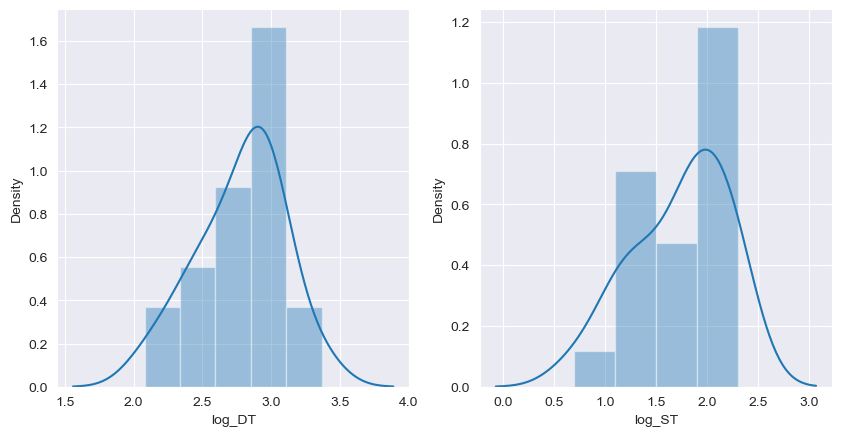

In [75]:
plt.subplot(1,2,1)
sns.distplot(df['log_DT'])

plt.subplot(1,2,2)
sns.distplot(df['log_ST'])

In [76]:
df['log_DT'].skew()

-0.4512901148522999

In [77]:
df['log_ST'].skew()

-0.6052357185134765

In [78]:
df['sqrt_DT']= np.sqrt(df['DT'])
df['sqrt_ST']=np.sqrt(df['ST'])

<AxesSubplot:xlabel='sqrt_ST', ylabel='Density'>

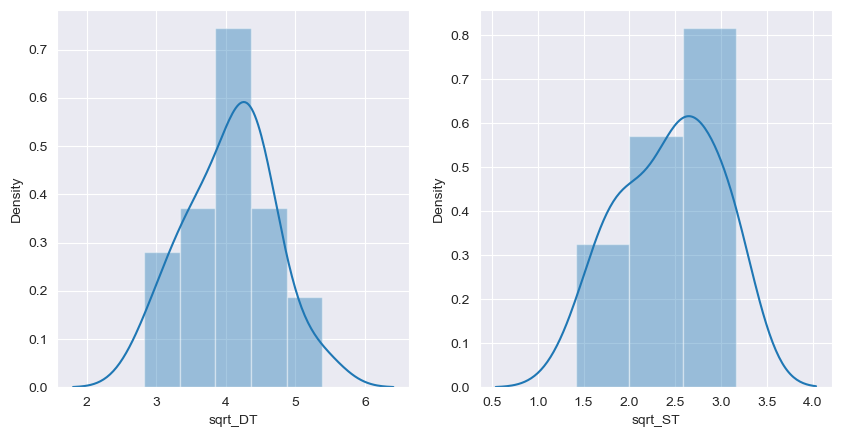

In [79]:
plt.subplot(1,2,1)
sns.distplot(df['sqrt_DT'])

plt.subplot(1,2,2)
sns.distplot(df['sqrt_ST'])

In [80]:
df['sqrt_DT'].skew()

-0.0618105135865213

In [81]:
df['sqrt_ST'].skew()

-0.25981634723613994

In [82]:
#new model

model1 =smf.ols('log_ST~log_DT', data=df).fit()

In [83]:
model.params

Intercept   -0.756673
DT           0.413744
dtype: float64

In [85]:
print(model1.tvalues)
print(model1.pvalues)

Intercept   -4.130615
log_DT       8.024484
dtype: float64
Intercept    5.685823e-04
log_DT       1.601539e-07
dtype: float64


In [87]:
model1.rsquared

0.77216134926874

In [ ]:
#Accuracacy is improved 